# Load Library

In [153]:
#%pip install -U scikit-learn
#%pip install seaborn
#%pip install plotly
#%pip install -U kaleido

In [154]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from Class.logisticRegression import logisticRegression

import matplotlib.pyplot as plt


import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data

In [155]:
df = pd.read_csv("./Data/heart_2020.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Analize data

In [156]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


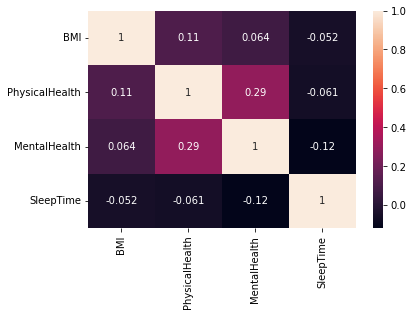

In [157]:
df.corr()
sn.heatmap(df.corr(), annot=True)
plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Plots

### Sex and HeartDisease

In [159]:
A0=['Male','Female']
B0=[] 
C0=[]
for a in A0:
    x=df.loc[(df['Sex']==a),:].loc[df['HeartDisease']=='Yes'].count()['HeartDisease']
    y=df.loc[(df['Sex'] ==a),].count()['HeartDisease']
    B0+=[x/y]
    C0+=[x]
fig = go.Figure()


fig=px.bar(A0,B0,color=C0,y=A0)
fig.update_layout(title_text="Effect of Sex on heart disease")
fig.show()
fig.write_image("./Images/dataSexVs.png")

In [160]:
D={}
L=['Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
for l in L:
    D[l]=[0,0]
Z=['No','Yes']
for l in L:
    for i in Z:
        x=df.loc[(df[l]==i),:].loc[df['HeartDisease']=='Yes'].HeartDisease.count()
        y=df.loc[(df[l]==i),].count()['HeartDisease']
        r=Z.index(i)
        D[l][r]=x/y
fig = make_subplots(rows=2, cols=4, subplot_titles=L)
B=[None]*8
r=0
for i in range(1,3):
    for j in range(1,5):
        B[r]=(i,j)
        r+=1
r=0
for l in L:
    fig.add_trace(go.Bar(x=['No','Yes'], y=D[l],name=l), row=B[r][0], col=B[r][1])
    r+=1

fig.update_layout(height=1200, width=1500, title_text="Effect of some factors on heart disease")
fig.show()
fig.write_image("./Images/dataVs.png")

In [161]:
A=list(df.groupby('Diabetic').groups.keys())
B=[]
C=[]
for p in A:
    x=df.loc[(df['Diabetic']==p),:].loc[df['HeartDisease']=='Yes'].count()['HeartDisease']
    y=df.loc[(df['Diabetic']==p),].count()['HeartDisease']
    B+=[x/y]
    C+=[y]
fig=px.bar(x=B,y=A,color=C)
fig.update_layout(title_text="Effect of Diabetic on heart disease")
fig.show()
fig.write_image("./Images/dataDiabeticVs.png")

In [162]:
A1=list(df.groupby('AgeCategory').groups.keys())
B1=[]
C1=[]
for p in A1:
    x=df.loc[(df['AgeCategory']==p),:].loc[df['HeartDisease']=='Yes'].count()['HeartDisease']
    y=df.loc[(df['AgeCategory']==p),].count()['HeartDisease']
    B1+=[x/y]
    C1+=[y]
fig=px.bar(x=B1,y=A1,color=C1)
fig.update_layout(title_text="Effect of AgeCategory on heart disease")
fig.show()
fig.write_image("./Images/dataAgeVs.png")

In [163]:
A2=list(df.groupby('Race').groups.keys())
B2=[]
C2=[]
for k in A2:
    x=df.loc[(df['Race']==k),:].loc[df['HeartDisease']=='Yes'].count()['HeartDisease']
    y=df.loc[(df['Race']==k),].count()['HeartDisease']
    B2+=[x/y]
    C2+=[y]
fig=px.bar(x=B2,y=A2,color=C2)
fig.update_layout(title_text="Effect of Race on heart disease")
fig.show()
fig.write_image("./Images/dataRaceVs.png")

In [164]:
A3=list(df.groupby('GenHealth').groups.keys())
B3=[]
C3=[]
for p in A3:
    x=df.loc[(df['GenHealth']==p),:].loc[df['HeartDisease']=='Yes'].count()['HeartDisease']
    y=df.loc[(df['GenHealth']==p),].count()['HeartDisease']
    B3+=[x/y]
    C3+=[y]
fig=px.bar(x=B3,y=A3,color=C3)
fig.update_layout(title_text="Effect of GenHealth on heart disease")
fig.show()
fig.write_image("./Images/dataGenHealthVs.png")

# Clean data

## Detect missing data

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Change yes and not to 1 and 0 respectively 

In [166]:
print('HeartDisease',df['HeartDisease'].unique())
print('Smoking',df['Smoking'].unique())
print('AlcoholDrinking',df['AlcoholDrinking'].unique())
print('Stroke',df['Stroke'].unique())
print('DiffWalking',df['DiffWalking'].unique())
print('PhysicalActivity',df['PhysicalActivity'].unique())
print('Asthma',df['Asthma'].unique())
print('KidneyDisease',df['KidneyDisease'].unique())
print('SkinCancer',df['SkinCancer'].unique())



HeartDisease ['No' 'Yes']
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
PhysicalActivity ['Yes' 'No']
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
SkinCancer ['Yes' 'No']


In [167]:
df.HeartDisease             =   df.HeartDisease.map(dict(Yes=1,No=0))
df.Smoking                  =   df.Smoking.map(dict(Yes=1,No=0))
df.AlcoholDrinking          =   df.AlcoholDrinking.map(dict(Yes=1,No=0))
df.Stroke                   =   df.Stroke.map(dict(Yes=1,No=0))
df.DiffWalking              =   df.DiffWalking.map(dict(Yes=1,No=0))
df.PhysicalActivity         =   df.PhysicalActivity.map(dict(Yes=1,No=0))
df.Asthma                   =   df.Asthma.map(dict(Yes=1,No=0))
df.KidneyDisease            =   df.KidneyDisease.map(dict(Yes=1,No=0))
df.SkinCancer               =   df.SkinCancer.map(dict(Yes=1,No=0))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [168]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


## Change tex to col

Diabetic

In [169]:
print('Diabetic',df['Diabetic'].unique())


Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [170]:
yes  = df.loc[(df['Diabetic']=='Yes'),:].HeartDisease.count()
no   = df.loc[(df['Diabetic']=='No'),:].HeartDisease.count()
nod  = df.loc[(df['Diabetic']=='No, borderline diabetes'),:].HeartDisease.count()
yesp = df.loc[(df['Diabetic']=='Yes (during pregnancy)'),:].HeartDisease.count()
total = yes + no + nod + yesp 
print ('Yes: ',yes, " = ",(yes/total)*100,'%')
print ('No: ',no, " = ",(no/total)*100,'%')
print ('No, borderline diabetes: ',nod, " = ",(nod/total)*100,'%')
print ('Yes (during pregnancy): ',yesp, " = ",(yesp/total)*100,'%')
print (total)

Yes:  40802  =  12.758798605356555 %
No:  269653  =  84.32058037180067 %
No, borderline diabetes:  6781  =  2.1204208946356258 %
Yes (during pregnancy):  2559  =  0.8002001282071326 %
319795


In [171]:
dic = {'Yes':1,'Yes (during pregnancy)':1,'No':0,'No, borderline diabetes:':0}
df['General Diabetic']      =df.Diabetic.map(dic)
dic = {'Yes':0,'Yes (during pregnancy)':0,'No':0,'No, borderline diabetes:':1}
df['Borderline Diabetic']   =df.Diabetic.map(dic)
dic = {'Yes':0,'Yes (during pregnancy)':1,'No':0,'No, borderline diabetes:':0}
df['Pregnancy Diabetic']    =df.Diabetic.map(dic)
df=df.drop(columns='Diabetic')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,General Diabetic,Borderline Diabetic,Pregnancy Diabetic
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,Very good,5.0,1,0,1,1.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,1,Very good,7.0,0,0,0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,Fair,8.0,1,0,0,1.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,Good,6.0,0,0,1,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,1,Very good,8.0,0,0,0,0.0,0.0,0.0


#### Sex

In [172]:
print('Sex',df['Sex'].unique())

Sex ['Female' 'Male']


In [173]:
df['Female']=df.Sex.map(dict(Female=1,Male=0))
df['Male']  =df.Sex.map(dict(Male=1,Female=0))
df=df.drop(columns='Sex')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,General Diabetic,Borderline Diabetic,Pregnancy Diabetic,Female,Male
0,0,16.60,1,0,0,3.0,30.0,0,55-59,White,...,Very good,5.0,1,0,1,1.0,0.0,0.0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,80 or older,White,...,Very good,7.0,0,0,0,0.0,0.0,0.0,1,0
2,0,26.58,1,0,0,20.0,30.0,0,65-69,White,...,Fair,8.0,1,0,0,1.0,0.0,0.0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,75-79,White,...,Good,6.0,0,0,1,0.0,0.0,0.0,1,0
4,0,23.71,0,0,0,28.0,0.0,1,40-44,White,...,Very good,8.0,0,0,0,0.0,0.0,0.0,1,0


#### Race

In [174]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [175]:
df['White']                                 =df.Race.map(dict(White=1))
df['Black']                                 =df.Race.map(dict(Black=1))
df['Asian']                                 =df.Race.map(dict(Asian=1))
dic = {'American Indian/Alaskan Native':1}
df['American Indian/Alaskan Native']        =df.Race.map(dic)
df['Other']                                 =df.Race.map(dict(Other=1))
df['Hispanic']                              =df.Race.map(dict(Hispanic=1))
df=df.fillna(0)
df=df.drop(columns='Race')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  object 
 9   PhysicalActivity                319795 non-null  int64  
 10  GenHealth                       319795 non-null  object 
 11  SleepTime                       319795 non-null  float64
 12  Asthma          

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,Borderline Diabetic,Pregnancy Diabetic,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,0,16.60,1,0,0,3.0,30.0,0,55-59,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,80 or older,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,65-69,1,...,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,75-79,0,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,40-44,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0


#### AgeCategory

In [176]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [177]:
dic = { '80 or older':13, '75-79':12,   '70-74':11, 
        '65-69':10      , '60-64':9 ,   '55-59':8, '50-54':7, 
        '45-49':6       , '40-44':5 ,   '35-39':4, '30-34':3, 
        '25-29':2       , '18-24':1 ,   '1-17':0}
df['AgeCategory']        =df.AgeCategory.map(dic)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  int64  
 9   PhysicalActivity                319795 non-null  int64  
 10  GenHealth                       319795 non-null  object 
 11  SleepTime                       319795 non-null  float64
 12  Asthma          

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,Borderline Diabetic,Pregnancy Diabetic,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,0,16.60,1,0,0,3.0,30.0,0,8,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,13,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,10,1,...,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,12,0,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,5,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0


#### GenHealth

In [178]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [179]:
dic = {'Excellent':4,'Very good':3,'Good':2,'Fair':1,'Poor':0}
df['GenHealth']=df.GenHealth.map(dic)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  int64  
 9   PhysicalActivity                319795 non-null  int64  
 10  GenHealth                       319795 non-null  int64  
 11  SleepTime                       319795 non-null  float64
 12  Asthma          

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,Borderline Diabetic,Pregnancy Diabetic,Female,Male,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic
0,0,16.60,1,0,0,3.0,30.0,0,8,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,20.34,0,0,1,0.0,0.0,0,13,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,26.58,1,0,0,20.0,30.0,0,10,1,...,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,12,0,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,5,1,...,0.0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0


## Show correlations

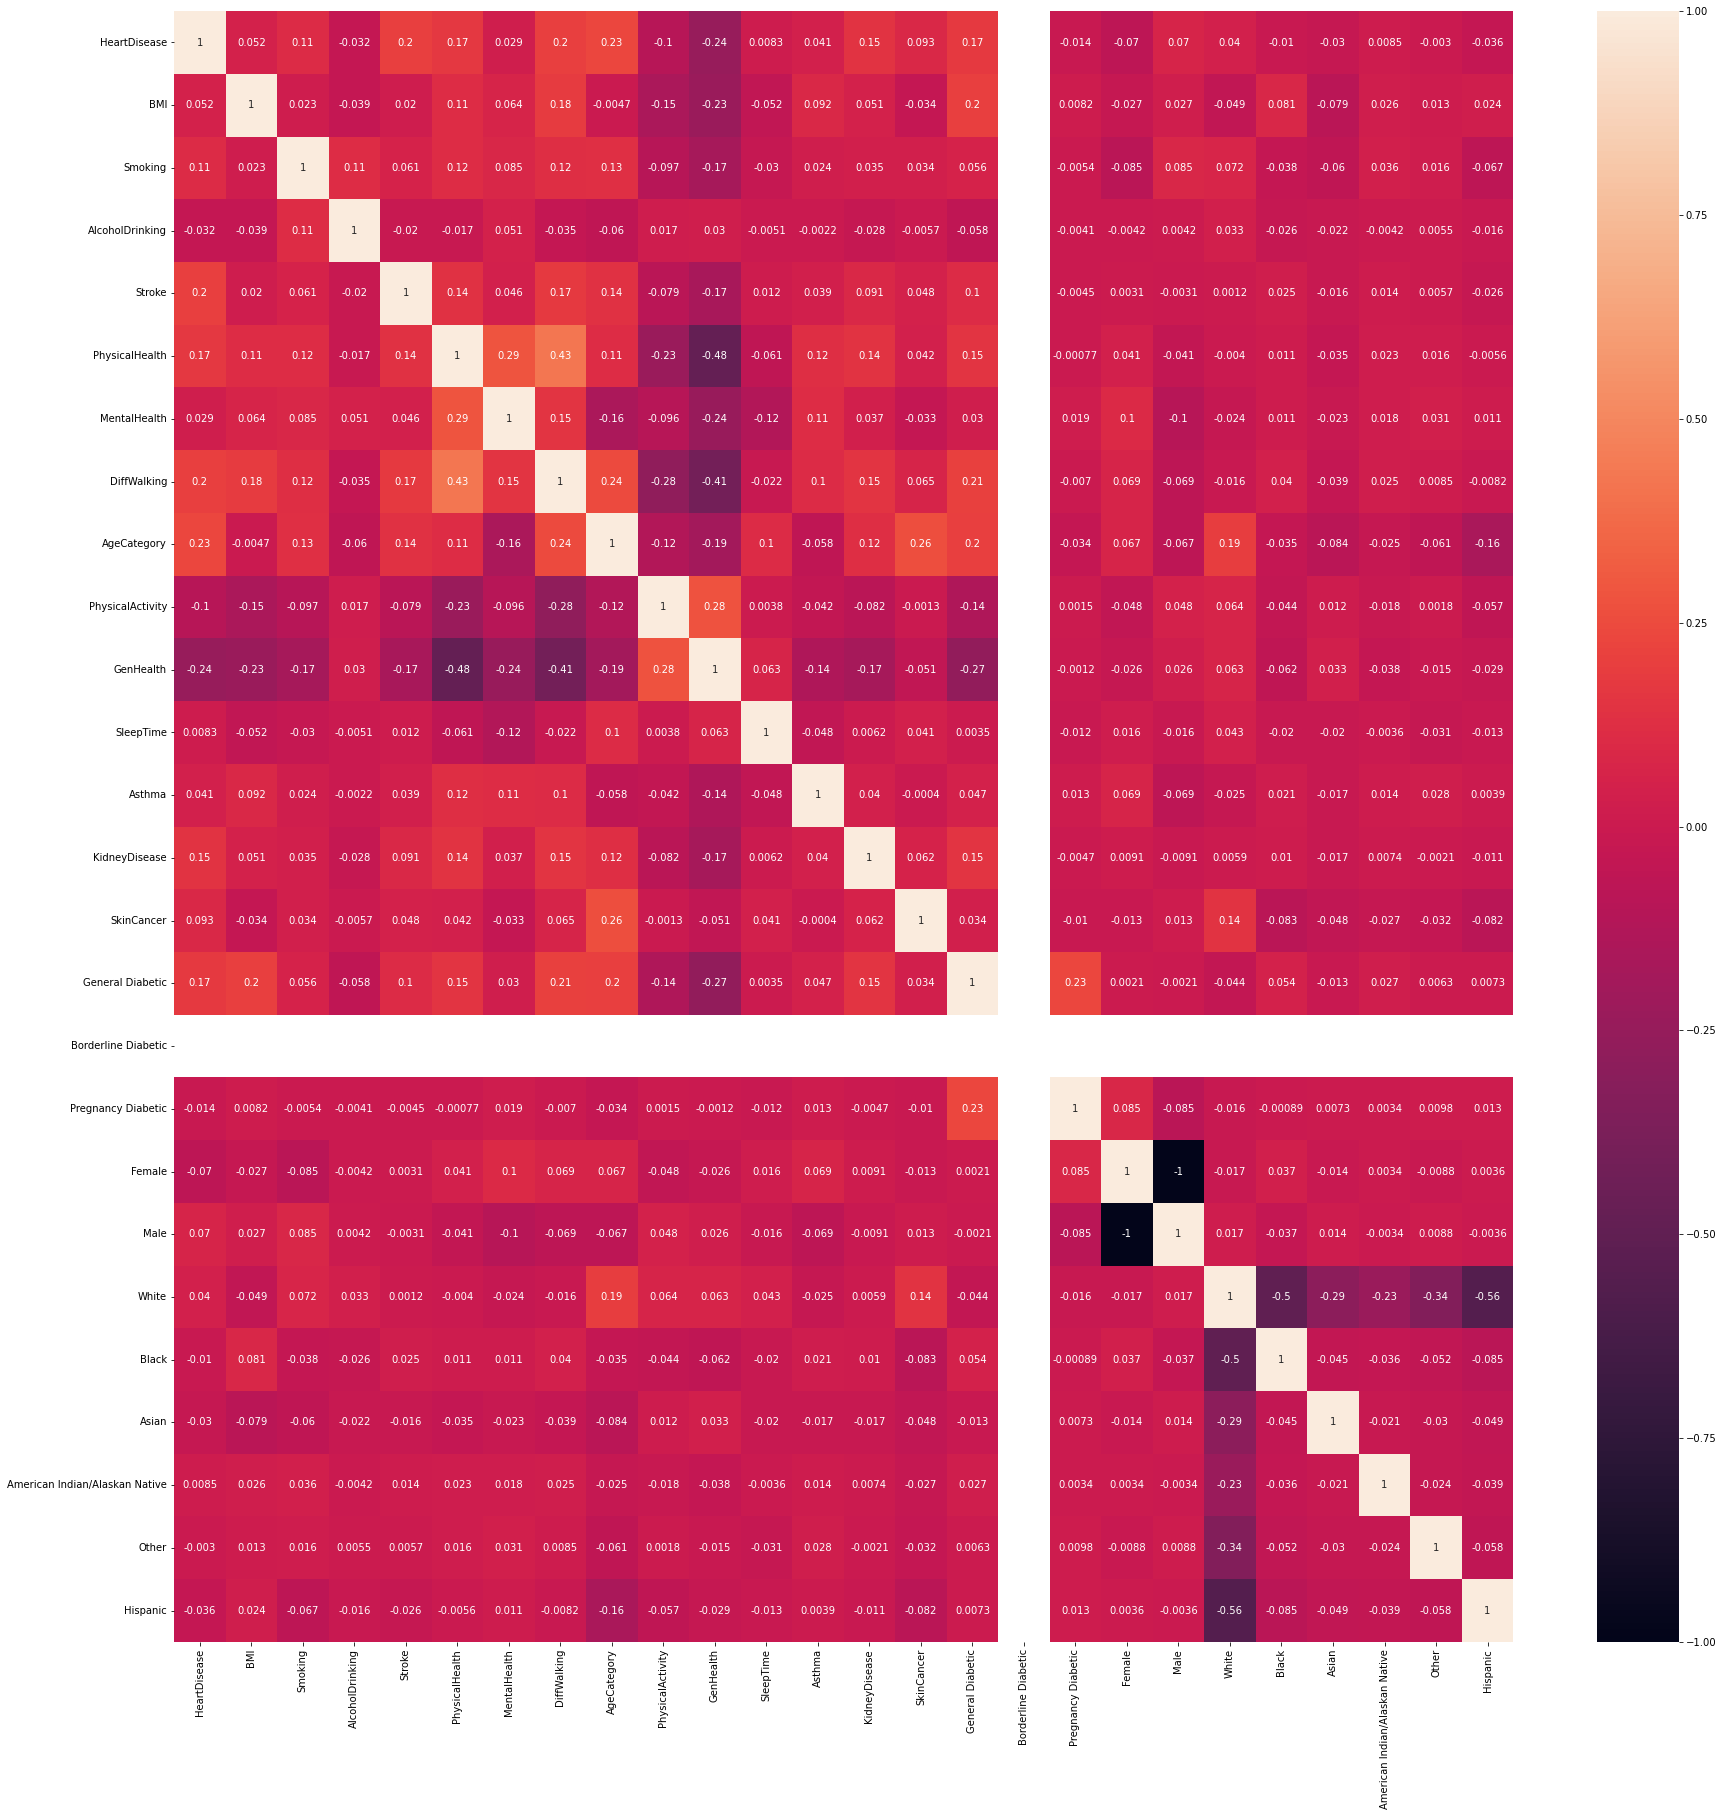

In [180]:
df.corr()

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(30)
sn.heatmap(df.corr(), annot=True)
plt.savefig("./Images/correlation.png")

## Save new data set

In [181]:
df.to_csv("./Data/heart_clean_data.csv", index=False)